In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
file_path = 'dft_traffic_counts_raw_counts.csv'

In [ ]:
data = pd.read_csv(file_path)

In [4]:
mean_value = data['All_motor_vehicles'].mean()  # You can use .median() if you prefer median imputation

# Impute missing values with the mean value
data['All_motor_vehicles'].fillna(mean_value, inplace=True)

In [5]:
columns_to_select = ['Count_date', 'hour' ,'Year','Direction_of_travel','All_motor_vehicles']

# Create a new DataFrame with the selected columns
selected_columns_df = data[columns_to_select]
selected_columns_df

,Count_date,hour,Year,Direction_of_travel,All_motor_vehicles
0,2014-06-25 00:00:00,7,2014,E,935.0
1,2014-06-25 00:00:00,8,2014,E,1102.0
2,2014-06-25 00:00:00,9,2014,E,773.0
3,2014-06-25 00:00:00,10,2014,E,778.0
4,2014-06-25 00:00:00,11,2014,E,875.0
...,...,...,...,...,...
4815499,2020-06-05 00:00:00,14,2020,E,57.0
4815500,2020-06-05 00:00:00,15,2020,E,74.0
4815501,2020-06-05 00:00:00,16,2020,E,69.0
4815502,2020-06-05 00:00:00,17,2020,E,73.0


In [6]:
# Group the DataFrame by 'Count_date' and 'Year' (assuming 'Year' is also needed for differentiation)
grouped = data.groupby(['Count_date', 'Year'])

# Calculate the sum of 'All_motor_vehicles' for each date
sum_of_vehicles_per_date = grouped['All_motor_vehicles'].sum().reset_index()
sum_of_vehicles_per_date

,Count_date,Year,All_motor_vehicles
0,2000-03-17 00:00:00,2000,1395788.0
1,2000-03-20 00:00:00,2000,1163281.0
2,2000-03-21 00:00:00,2000,1498590.0
3,2000-03-22 00:00:00,2000,1375484.0
4,2000-03-23 00:00:00,2000,1247304.0
...,...,...,...
2562,2022-10-19 00:00:00,2022,303337.0
2563,2022-10-20 00:00:00,2022,193820.0
2564,2022-10-21 00:00:00,2022,141446.0
2565,2022-11-01 00:00:00,2022,30928.0


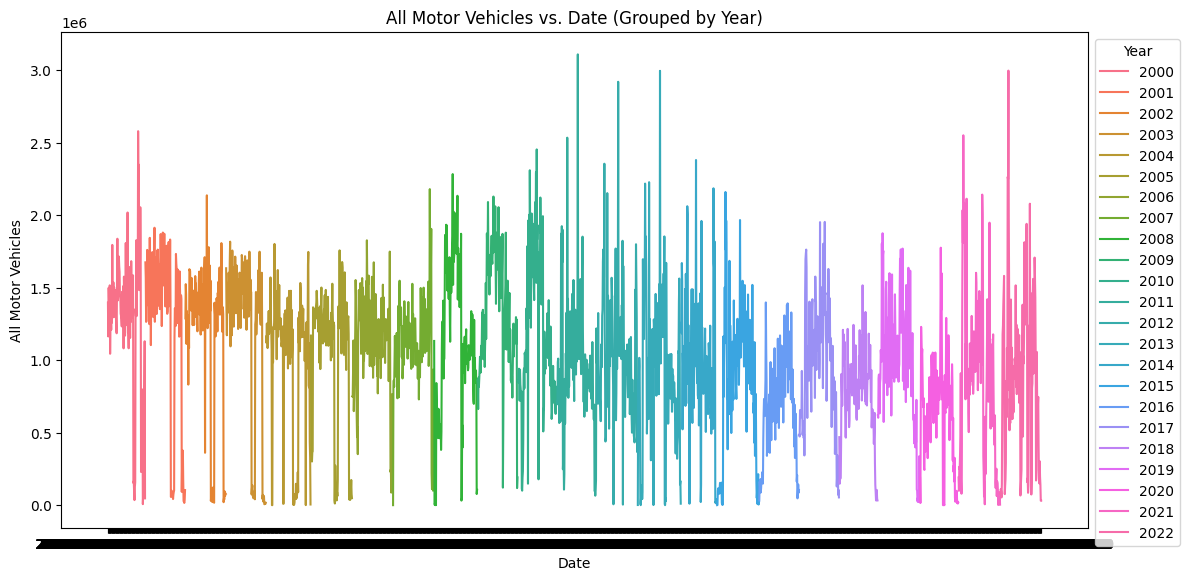

In [7]:

# Group the DataFrame by 'Count_date' and 'Year' and sum 'All_motor_vehicles'
grouped = data.groupby(['Count_date', 'Year'])['All_motor_vehicles'].sum().reset_index()

# Create a color palette with unique colors for each year
palette = sns.color_palette("husl", n_colors=len(grouped['Year'].unique()))

# Plot the data, assigning a unique color to each year
plt.figure(figsize=(12, 6))
for i, year in enumerate(grouped['Year'].unique()):
    data = grouped[grouped['Year'] == year]
    plt.plot(data['Count_date'], data['All_motor_vehicles'], label=str(year), color=palette[i])

# Customize the plot
plt.xlabel('Date')
plt.ylabel('All Motor Vehicles')
plt.title('All Motor Vehicles vs. Date (Grouped by Year)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\neste\AppData\Local\Temp\ipykernel_16240\1770173407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Count_date']).dt.month
C:\Users\neste\AppData\Local\Temp\ipykernel_16240\1770173407.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(grouped))(np.arange(len(grouped)))


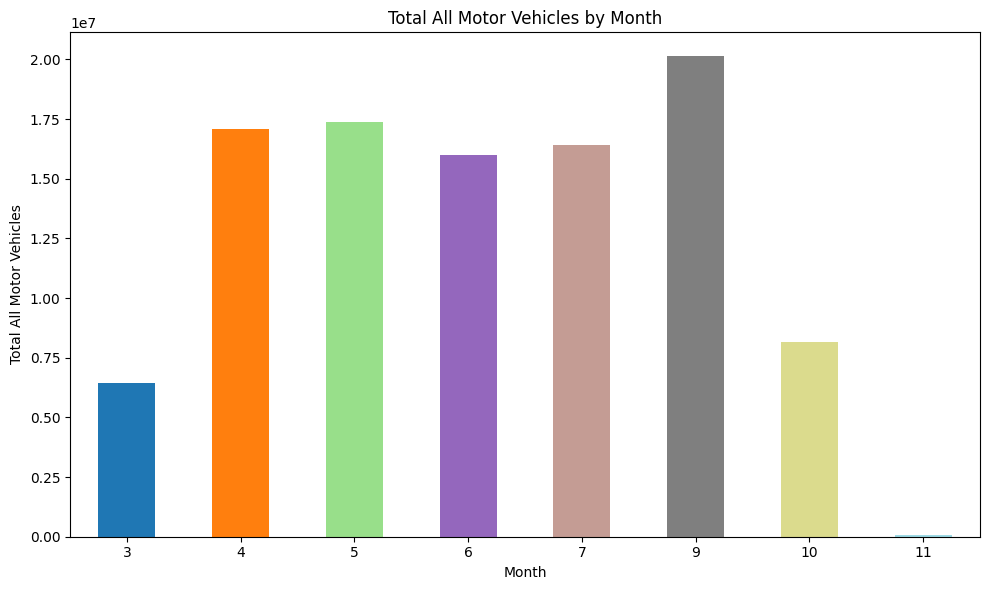

In [8]:
# Extract the month from the 'Count_date' column
data['Month'] = pd.to_datetime(data['Count_date']).dt.month

# Group the DataFrame by 'Month' and sum 'All_motor_vehicles'
grouped = data.groupby('Month')['All_motor_vehicles'].sum()

# Create a color map for the months
colors = cm.get_cmap('tab20', len(grouped))(np.arange(len(grouped)))

# Plot the data as a bar plot
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color=colors)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Total All Motor Vehicles')
plt.title('Total All Motor Vehicles by Month')
plt.xticks(range(len(grouped.index)), grouped.index, rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
grouped = data.groupby(['Count_date', 'Year'])['All_motor_vehicles'].sum().reset_index()
grouped

,Count_date,Year,All_motor_vehicles
0,2022-03-18 00:00:00,2022,79599.0
1,2022-03-21 00:00:00,2022,110038.0
2,2022-03-22 00:00:00,2022,97502.0
3,2022-03-23 00:00:00,2022,53358.0
4,2022-03-24 00:00:00,2022,145677.0
...,...,...,...
108,2022-10-19 00:00:00,2022,303337.0
109,2022-10-20 00:00:00,2022,193820.0
110,2022-10-21 00:00:00,2022,141446.0
111,2022-11-01 00:00:00,2022,30928.0


In [10]:
# Convert 'Count_date' to a DateTime object

grouped['Count_date'] = pd.to_datetime(grouped['Count_date'])

# Format the date column as a date without the time
grouped['Count_date'] = grouped['Count_date'].dt.strftime('%Y-%m-%d')

# Now, the 'Count_date' column will only contain dates in the 'YYYY-MM-DD' format
grouped

sum_of_vehicles_per_date['Count_date'] = pd.to_datetime(sum_of_vehicles_per_date['Count_date'])
sort = sum_of_vehicles_per_date.sort_values(by = 'Count_date', ascending = True)
sort
sort['month'] = sort['Count_date'].dt.strftime('%B')
ready = sort.groupby(['Year','month'])['All_motor_vehicles'].sum().reset_index()
#ready

In [11]:
data = ready
data
decomposition = sm.tsa.seasonal_decompose(data['All_motor_vehicles'], model='additive', period = 12)

In [12]:
sum_of_vehicles_per_date['Count_date'] = pd.to_datetime(sum_of_vehicles_per_date['Count_date'])
sort = sum_of_vehicles_per_date.sort_values(by = 'Count_date', ascending = True)
#sort
sort['month'] = sort['Count_date'].dt.strftime('%B')
ready = sort.groupby(['Year','month'])['All_motor_vehicles'].sum().reset_index()


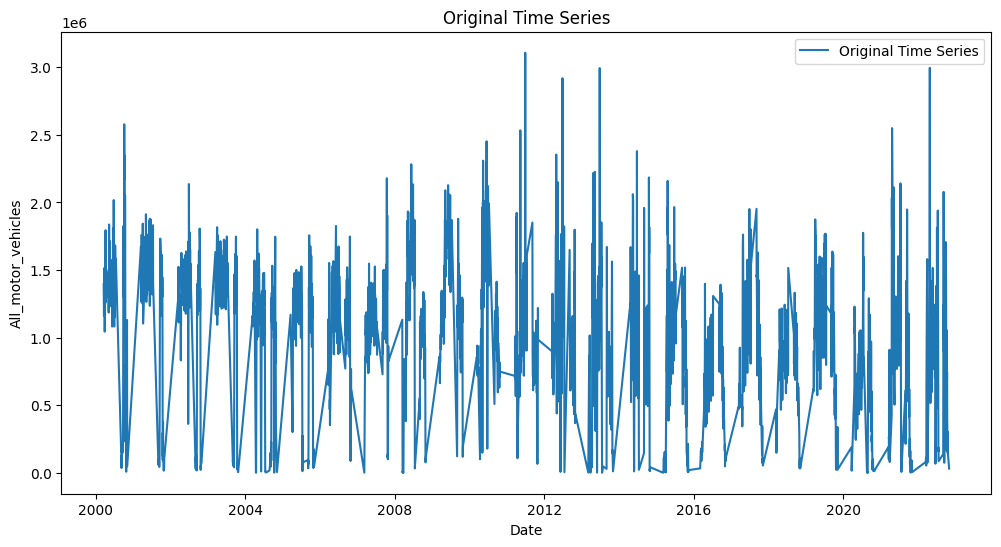

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a sample time series
date_rng = sort['Count_date']
data = sort['All_motor_vehicles']
df = pd.DataFrame({'Date': date_rng, 'All_motor_vehicles': data})
df.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['All_motor_vehicles'], label='Original Time Series')
plt.xlabel('Date')
plt.ylabel('All_motor_vehicles')
plt.title('Original Time Series')
plt.legend()
plt.show()


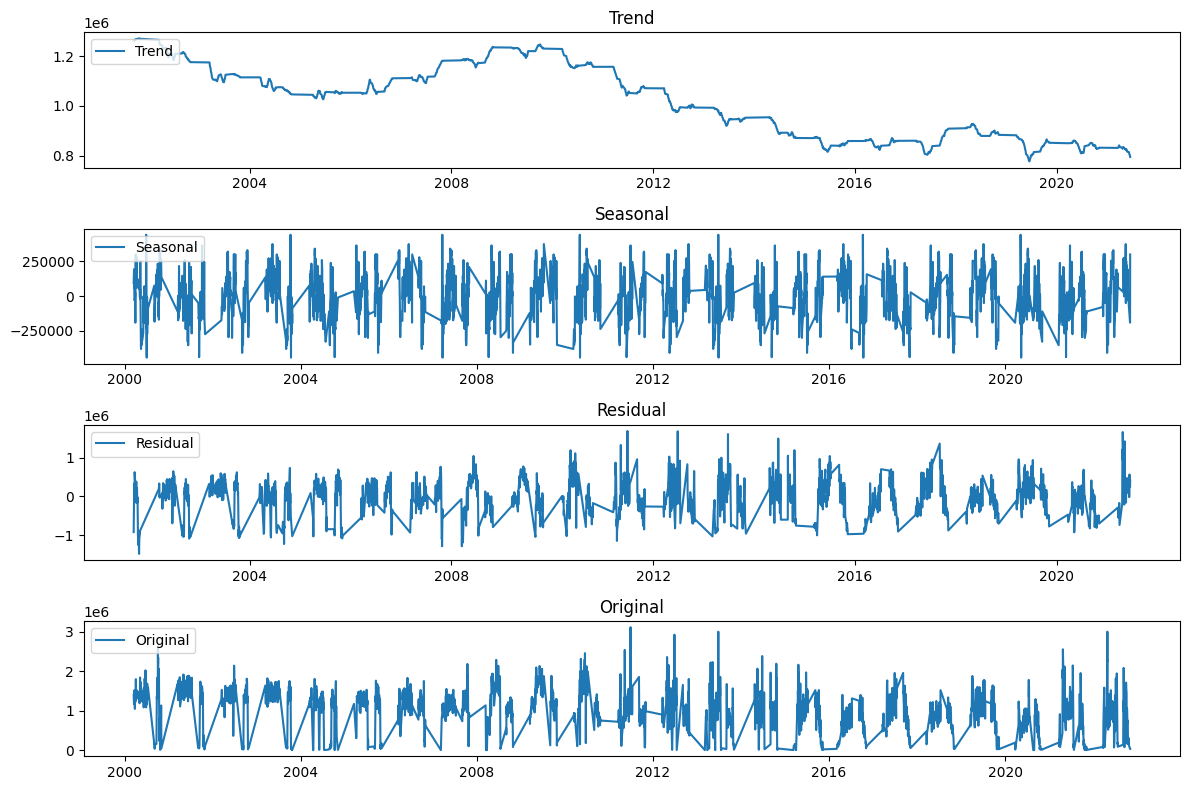

In [14]:
# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(df['All_motor_vehicles'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(412)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(413)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

plt.subplot(414)
plt.plot(df['All_motor_vehicles'], label='Original')
plt.legend(loc='upper left')
plt.title('Original')

plt.tight_layout()
plt.show()


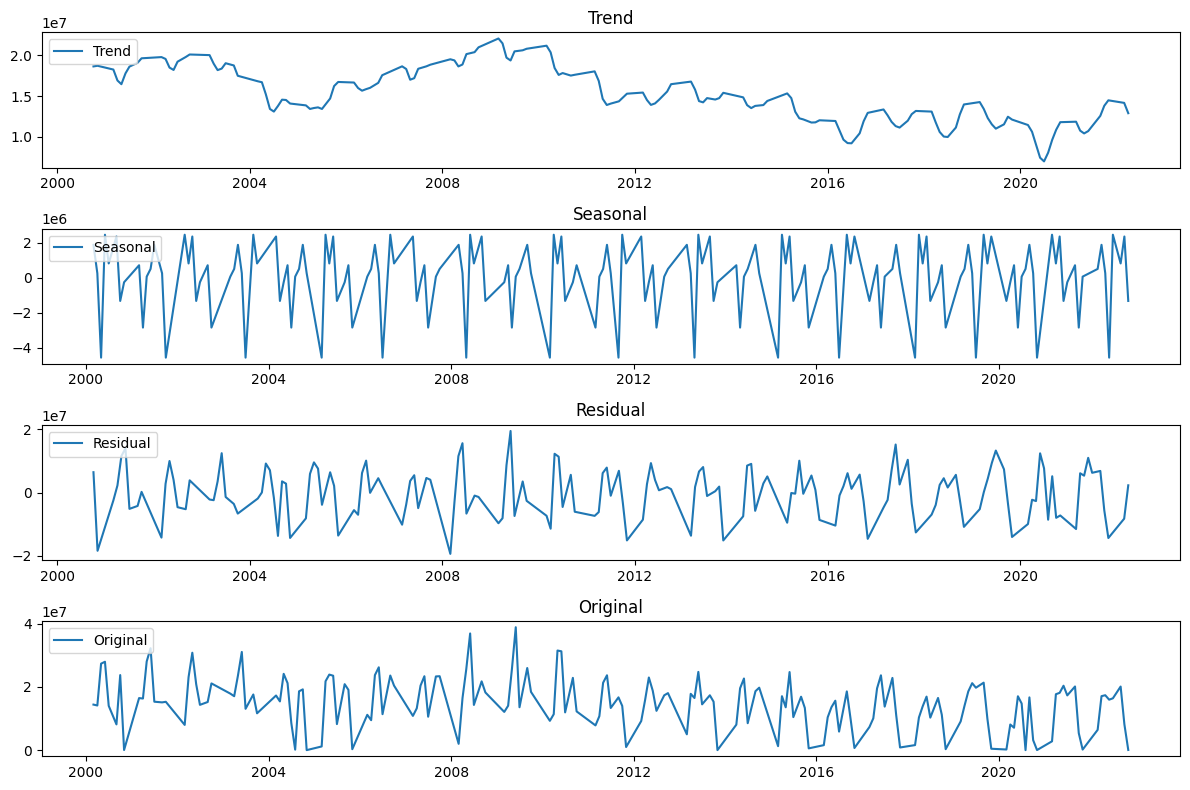

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample DataFrame with monthly data spanning multiple years
data = ready

# Create a DataFrame
df = pd.DataFrame(data)

# Create a numerical index for the months (1 for January, 2 for February, etc.)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['Month_Index'] = df['month'].map(month_mapping)

# Create a date index combining 'Year' and 'Month_Index'
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_Index'].astype(str), format='%Y-%m')
df.set_index('Date', inplace=True)

# Sort the DataFrame by the date index to ensure chronological order
df.sort_index(inplace=True)

# Perform the time series decomposition
result = seasonal_decompose(df['All_motor_vehicles'], model='additive', period=12)  # Assuming monthly data with a yearly (12-month) seasonal pattern

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(412)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal')

plt.subplot(413)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual')

plt.subplot(414)
plt.plot(df['All_motor_vehicles'], label='Original')
plt.legend(loc='upper left')
plt.title('Original')

plt.tight_layout()
plt.show()


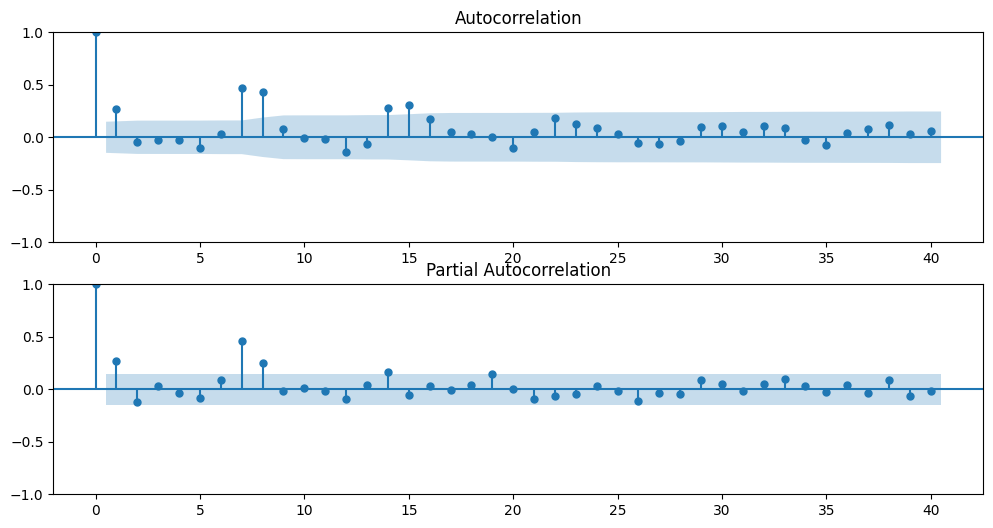

ADF Statistic: -2.00595379431144
p-value: 0.2839686850645784
Critical Values:
1%: -3.470126426071447
5%: -2.8790075987120027
10%: -2.5760826967621644


C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

                               SARIMAX Results                                
Dep. Variable:     All_motor_vehicles   No. Observations:                  175
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3012.008
Date:                Sat, 14 Oct 2023   AIC                           6030.017
Time:                        20:52:47   BIC                           6039.494
Sample:                             0   HQIC                          6033.861
                                - 175                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2172      0.105      2.072      0.038       0.012       0.423
ma.L1         -0.9620      0.037    -25.700      0.000      -1.035      -0.889
sigma2      7.753e+13        nan        nan        n

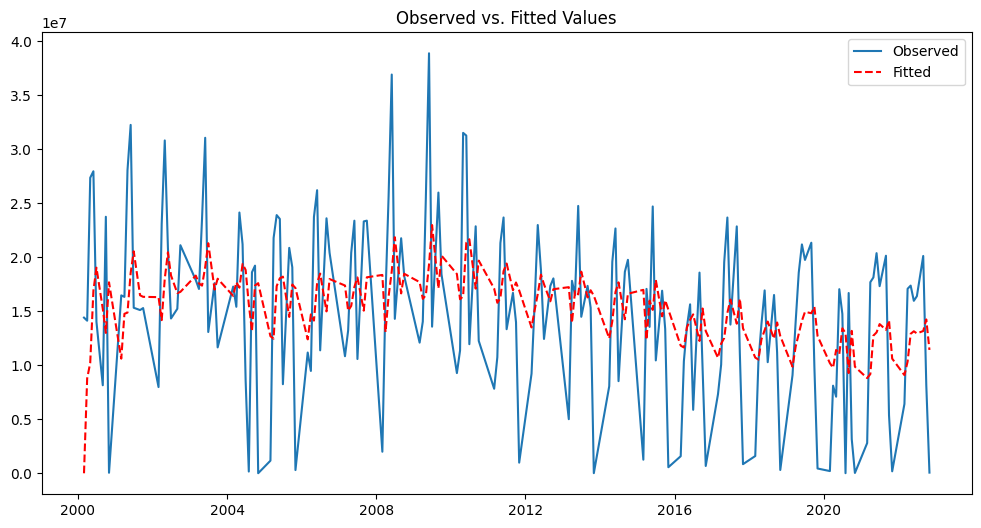

In [16]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Plot the ACF and PACF to determine the order of differencing (d) and the AR and MA components (p, q)
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['All_motor_vehicles'], ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(df['All_motor_vehicles'], ax=plt.gca(), lags=40)
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(df['All_motor_vehicles'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'{key}: {value}')

# Based on the ACF, PACF, and ADF test results, determine the values of p, d, and q
p = 1  # AR component (lag order)
d = 1  # Differencing order (based on the ADF test)
q = 1  # MA component (lag order)

# Fit the ARIMA model
model = ARIMA(df['All_motor_vehicles'], order=(p, d, q))
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the observed vs. fitted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['All_motor_vehicles'], label='Observed')
plt.plot(df.index, results.fittedvalues, color='red', label='Fitted', linestyle='--')
plt.legend()
plt.title('Observed vs. Fitted Values')
plt.show()

In [17]:
ready

,Year,month,All_motor_vehicles
0,2000,April,14132647.0
1,2000,July,14031058.0
2,2000,June,27970693.0
3,2000,March,14416787.0
4,2000,May,27371787.0
...,...,...,...
170,2022,March,6420309.0
171,2022,May,17382426.0
172,2022,November,61723.0
173,2022,October,8179102.0


In [18]:
data['All_motor_vehicles'] = data['All_motor_vehicles'].astype(int)
data = pd.read_csv(file_path)

In [19]:


# Replace NA and infinite values with 0
data['All_motor_vehicles'].fillna(0, inplace=True)
data['All_motor_vehicles'].replace([np.inf, -np.inf], 0, inplace=True)
data['All_motor_vehicles'] = data['All_motor_vehicles'].astype(int)
motor = data['All_motor_vehicles']
motor


0           935
1          1102
2           773
3           778
4           875
           ... 
4815499      57
4815500      74
4815501      69
4815502      73
4815503      49
Name: All_motor_vehicles, Length: 4815504, dtype: int32

In [20]:
def df_to_x_y(data, window_size = 12):
    df_as_np = data.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + 12]]
        X.append(row)
        label = df_as_np[i + 12]
        y.append(label)
    return np.array(X),np.array(y)

In [21]:
WINDOW_SIZE = 12
X, y = df_to_x_y(motor, WINDOW_SIZE)
X.shape, y.shape

((4815492, 12, 1), (4815492,))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [23]:
X_train, y_train = X[:4000000],y [:4000000]
X_val, y_val = X[4000000:4815492], y[4000000:4815492]
X_test, y_test = X[4500000:], y[45000000:]

In [24]:
model1 = Sequential()
model1.add(InputLayer((12,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
from tensorflow.keras.metrics import RootMeanSquaredError

# Create an instance of the RootMeanSquaredError metric
rmse_metric = RootMeanSquaredError()

# Compile the model with the metric
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[rmse_metric])


In [26]:
# Define a ModelCheckpoint callback
cp = ModelCheckpoint(filepath='C:\\Users\\neste\\Documents\\selenium\\your_model_checkpoint.h5', save_best_only=True, verbose=1)
model1.fit(X_train,y_train, validation_data = (X_val,y_val), epochs = 10,callbacks = [cp])

Epoch 1/10
124998/125000 [============================>.] - ETA: 0s - loss: 172949.0156 - root_mean_squared_error: 415.8714
Epoch 1: val_loss improved from inf to 110460.81250, saving model to C:\Users\neste\Documents\selenium\your_model_checkpoint.h5


C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125000/125000 [==============================] - 1121s 9ms/step - loss: 172946.8281 - root_mean_squared_error: 415.8688 - val_loss: 110460.8125 - val_root_mean_squared_error: 332.3564
Epoch 2/10
125000/125000 [==============================] - ETA: 0s - loss: 161127.9531 - root_mean_squared_error: 401.4075
Epoch 2: val_loss did not improve from 110460.81250
125000/125000 [==============================] - 1095s 9ms/step - loss: 161127.9531 - root_mean_squared_error: 401.4075 - val_loss: 210492.5000 - val_root_mean_squared_error: 458.7946
Epoch 3/10
124998/125000 [============================>.] - ETA: 0s - loss: 158299.3125 - root_mean_squared_error: 397.8685
Epoch 3: val_loss did not improve from 110460.81250
125000/125000 [==============================] - 1086s 9ms/step - loss: 158298.3438 - root_mean_squared_error: 397.8672 - val_loss: 154519.2344 - val_root_mean_squared_error: 393.0894
Epoch 4/10
124994/125000 [============================>.] - ETA: 0s - loss: 149681.3594 - root_m

In [28]:

# Train your model using the subset
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
124996/125000 [============================>.] - ETA: 0s - loss: 144283.9844 - root_mean_squared_error: 379.8473
Epoch 1: val_loss did not improve from 100785.00000
125000/125000 [==============================] - 1308s 10ms/step - loss: 144281.3906 - root_mean_squared_error: 379.8439 - val_loss: 140272.0000 - val_root_mean_squared_error: 374.5291
Epoch 2/10
124997/125000 [============================>.] - ETA: 0s - loss: 152956.8750 - root_mean_squared_error: 391.0970
Epoch 2: val_loss did not improve from 100785.00000
125000/125000 [==============================] - 1246s 10ms/step - loss: 152956.0000 - root_mean_squared_error: 391.0959 - val_loss: 183439.6719 - val_root_mean_squared_error: 428.2986
Epoch 3/10
124997/125000 [============================>.] - ETA: 0s - loss: 143484.8906 - root_mean_squared_error: 378.7940
Epoch 3: val_loss did not improve from 100785.00000
125000/125000 [==============================] - 1262s 10ms/step - loss: 143490.5781 - root_mean_squar

KeyboardInterrupt: 

In [29]:
import os
print("Current working directory:", os.getcwd())
print("File path for saving the model:", 'your_model_checkpoint.h5')

Current working directory: c:\Users\neste\Documents\selenium
File path for saving the model: your_model_checkpoint.h5


In [30]:
import tensorflow.keras as keras

model1 = keras.models.load_model('your_model_checkpoint.h5')  # Replace 'your_model_checkpoint.h5' with the actual filename and extension of your model


In [31]:
train_predictions =  model1.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train predictions' : train_predictions, 'Actuals' : y_train})
train_results

125000/125000 [==============================] - 699s 6ms/step


,Train predictions,Actuals
0,817.330627,987
1,852.612366,1208
2,1027.390503,1104
3,919.076721,786
4,737.922180,778
...,...,...
3999995,147.091873,165
3999996,125.695389,147
3999997,133.199295,118
3999998,119.842606,139


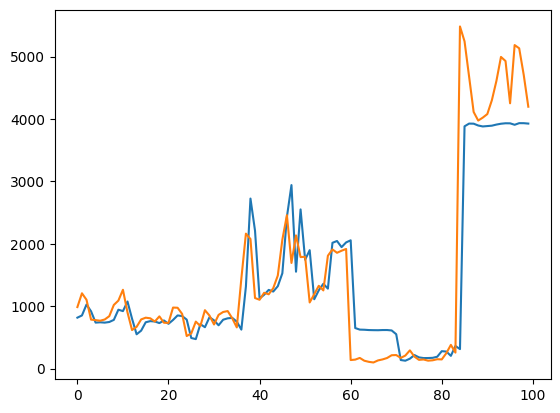

In [34]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [35]:
val_predictions =  model1.predict(X_val).flatten()
val_results = pd.DataFrame(data = {'val predictions' : val_predictions, 'Actuals' : y_val})
val_results

25485/25485 [==============================] - 169s 7ms/step


,val predictions,Actuals
0,145.304276,173
1,141.223465,223
2,257.554260,215
3,138.371902,227
4,164.815262,145
...,...,...
815487,68.381424,57
815488,59.820145,74
815489,71.198685,69
815490,60.473465,73


In [3]:

# GARCH MODEL START 
import arch
from arch import arch_model

In [4]:
data = pd.read_csv(file_path)
mean_value = data['All_motor_vehicles'].mean()  # You can use .median() if you prefer median imputation

# Impute missing values with the mean value
data['All_motor_vehicles'].fillna(mean_value, inplace=True)

In [5]:
returns = data['All_motor_vehicles']

# Create a GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)

# Fit the model
results = model.fit()

C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.855e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3648613127.729357
Iteration:      2,   Func. Count:     12,   Neg. LLF: 89200906.15061721
Iteration:      3,   Func. Count:     24,   Neg. LLF: 59297576.29486624
Iteration:      4,   Func. Count:     30,   Neg. LLF: 35412837.9765103
Optimization terminated successfully    (Exit mode 0)
            Current function value: 35412837.967406936
            Iterations: 8
            Function evaluations: 30
            Gradient evaluations: 4


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox



# Forecast future volatility
forecast_horizon = 5  # Adjust the horizon as needed
forecast = results.forecast(start=0, horizon=forecast_horizon)
forecast_variance = forecast.variance.iloc[-1, :]


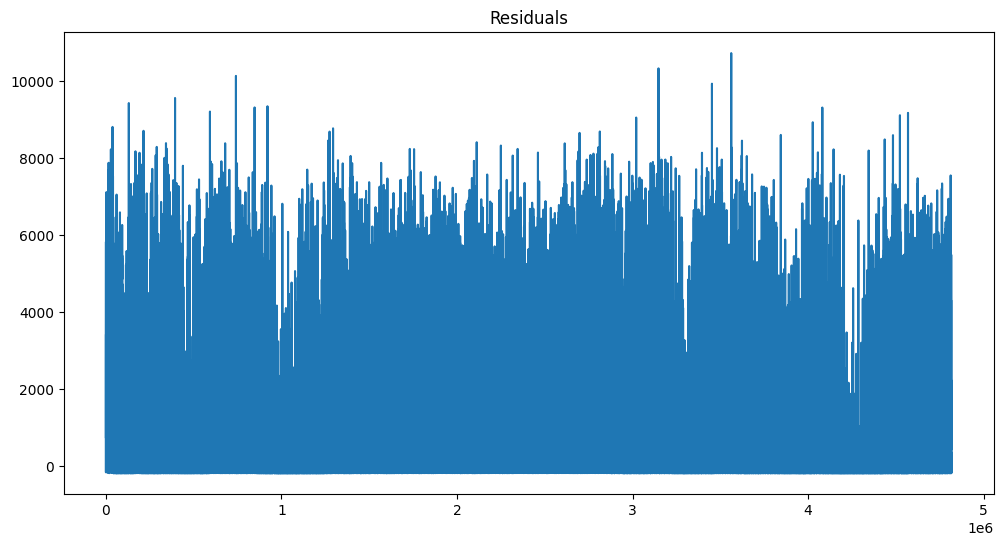

In [10]:
# Get model residuals
residuals = results.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Check for autocorrelation in residuals using Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
p_value = lb_test.loc[10, "lb_pvalue"]

if p_value < 0.05:
    print("Autocorrelation detected in residuals (p-value < 0.05).")
else:
    print("No significant autocorrelation in residuals (p-value >= 0.05).")


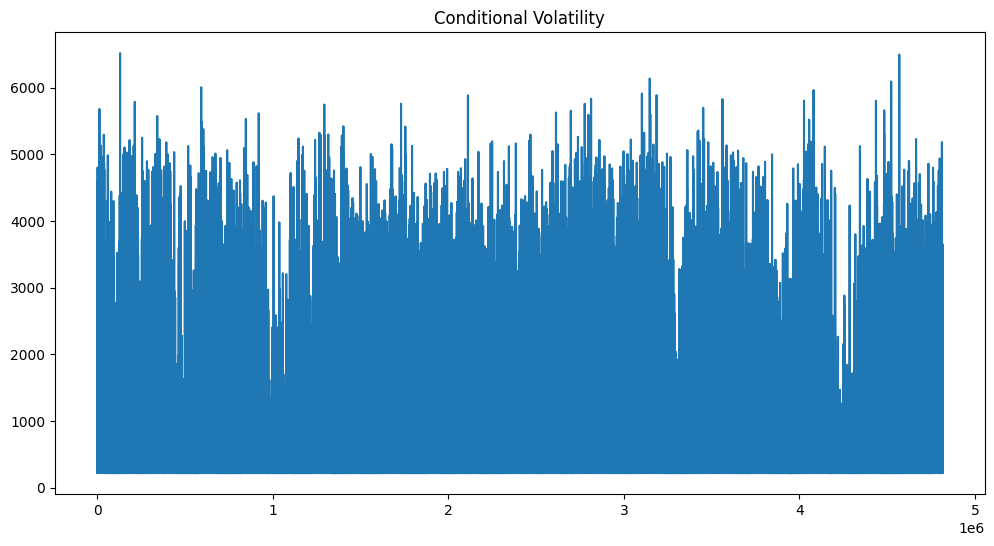

In [8]:
conditional_volatility = results.conditional_volatility


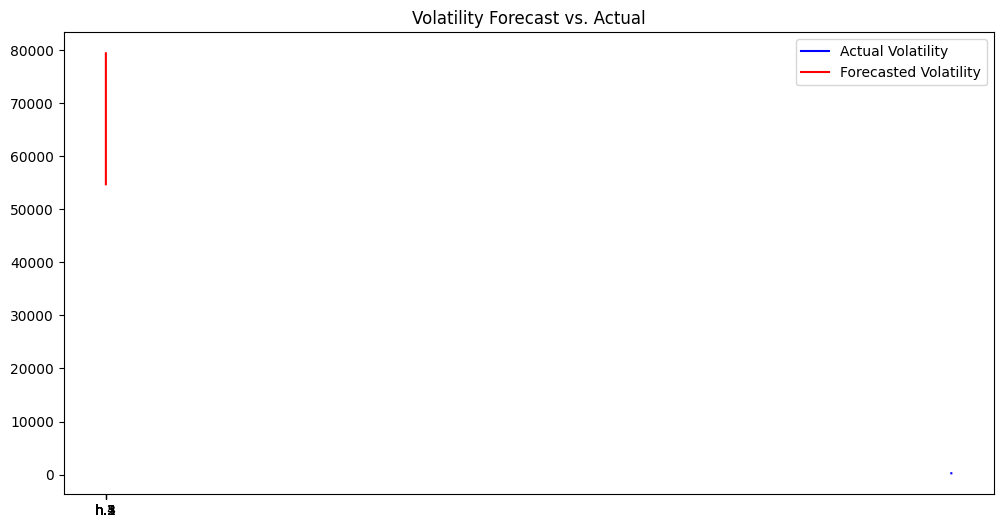

In [9]:

# Compare the forecasted volatility to the actual data
actual_volatility = conditional_volatility[-forecast_horizon:]
plt.figure(figsize=(12, 6))
plt.plot(actual_volatility, label='Actual Volatility', color='blue')
plt.plot(forecast_variance, label='Forecasted Volatility', color='red')
plt.title('Volatility Forecast vs. Actual')
plt.legend()
plt.show()

In [7]:
results.summary()
#GARCH MODEL END

C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:     All_motor_vehicles   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:           -3.54128e+07
Distribution:                  Normal   AIC:                       7.08257e+07
Method:            Maximum Likelihood   BIC:                       7.08257e+07
                                        No. Observations:              4815504
Date:                Thu, Oct 19 2023   Df Residuals:                  4815503
Time:                        21:28:40   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           172.4341     16.223     10.629  2.189e-26 [1.406e+02,2.042e+02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.3710e+04   5943.440      2.307  2.107e-02 [2.061e+03,2.536e+04]
alpha[1]       0.1769  1.495e-02     11.828  2.804e-32     [  0.148,  0.206]
beta[1]        0.7072  5.705e-02     12.396  2.753e-35     [  0.595,  0.819]
============================================================================

Covariance estimator: robust
"""

In [46]:
from prophet import Prophet

C:\Users\neste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [47]:
data = pd.read_csv(file_path)

In [48]:
data.rename(columns = {"Count_date":"ds",'All_motor_vehicles':'y'}, inplace = True)
data

,Count_point_id,Direction_of_travel,Year,ds,hour,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,y
0,749,E,2014,2014-06-25 00:00:00,7,3,Scotland,S92000003,39,East Ayrshire,...,5.0,31,15.0,4.0,4.0,4.0,13,12.0,52.0,935.0
1,749,E,2014,2014-06-25 00:00:00,8,3,Scotland,S92000003,39,East Ayrshire,...,7.0,103,29.0,3.0,2.0,7.0,18,20.0,79.0,1102.0
2,749,E,2014,2014-06-25 00:00:00,9,3,Scotland,S92000003,39,East Ayrshire,...,14.0,88,21.0,3.0,5.0,9.0,17,19.0,74.0,773.0
3,749,E,2014,2014-06-25 00:00:00,10,3,Scotland,S92000003,39,East Ayrshire,...,8.0,90,31.0,6.0,10.0,7.0,18,17.0,89.0,778.0
4,749,E,2014,2014-06-25 00:00:00,11,3,Scotland,S92000003,39,East Ayrshire,...,18.0,75,38.0,2.0,2.0,3.0,16,24.0,85.0,875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815499,811618,E,2020,2020-06-05 00:00:00,14,3,Scotland,S92000003,31,Perth & Kinross,...,1.0,8,0.0,0.0,0.0,0.0,0,0.0,0.0,57.0
4815500,811618,E,2020,2020-06-05 00:00:00,15,3,Scotland,S92000003,31,Perth & Kinross,...,0.0,14,0.0,0.0,0.0,0.0,0,0.0,0.0,74.0
4815501,811618,E,2020,2020-06-05 00:00:00,16,3,Scotland,S92000003,31,Perth & Kinross,...,0.0,15,2.0,0.0,0.0,0.0,0,1.0,3.0,69.0
4815502,811618,E,2020,2020-06-05 00:00:00,17,3,Scotland,S92000003,31,Perth & Kinross,...,1.0,8,0.0,0.0,0.0,0.0,0,0.0,0.0,73.0


In [49]:
model = Prophet()
model.fit(data)

In [ ]:
# Define a future DataFrame for forecasting (adjust 'periods' as needed)
future = model.make_future_dataframe(periods=365)  # Forecast for an additional 365 days

In [ ]:
# Make predictions
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [ ]:
# Visualize the forecast
from prophet.plot import plot
fig = model.plot(forecast)
